In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy  as np 

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X=data.iloc[:,[3,4]].values

In [4]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Elbow Method
##### to define exact number of clusters(k)

In [7]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init='k-means++',random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

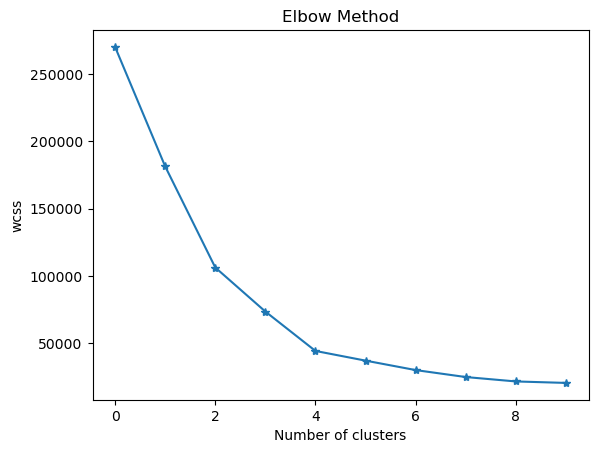

In [9]:
plt.plot(wcss,marker='*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

## Upon Elbow Method :--> number of clusters is 3

In [11]:
model=KMeans(n_clusters=3,init='k-means++',random_state=0)
model.fit(X)

KMeans(n_clusters=3, random_state=0)

In [12]:
y_pred=model.predict(X) 

In [13]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

## Visualization Result

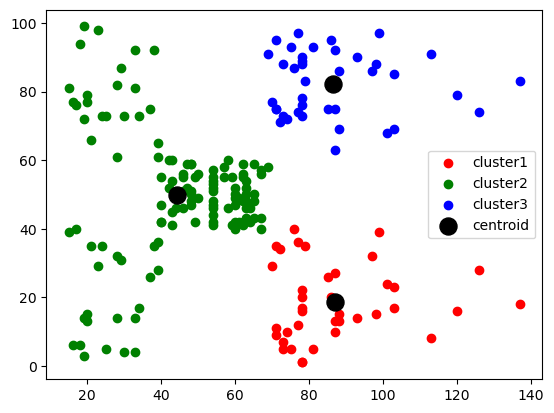

In [16]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],color='red',label='cluster1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],color='green',label='cluster2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],color='blue',label='cluster3')


plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=150,color='black',label='centroid') 
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X,y_pred))

0.46761358158775435
